# Sentiment Analysis of Kenyan Political Tweets

# Cleaning and filtering the tweet dataset

In this section, I aim to clean and filter the dataset that I will use to peform sentiment analysis on, so as to gauge the level of hate speech in the Kenyan twitter space.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

raw_dataset = pd.read_csv('/content/drive/MyDrive/kenya_political_tweets.csv')
raw_dataset.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1396091006030856192,Doomster,Utopia slums,"Alt-left, liberal, pronoun:them",2009-08-23 12:22:53,309,907,8050,False,2021-05-22 13:10:08,@PrettyAmmina The change to the new blue unifo...,NaN,Twitter Web App,0.0,0.0,False
1,1395981137764397056,Unruly 🗯,Morayfield,I don't know what you thought this was gonna b...,2011-04-20 19:35:54,1053,523,5279,False,2021-05-22 05:53:33,I think it's now safe to say President Uhuru K...,NaN,Twitter for Android,0.0,0.0,False
2,1395433210490798082,Khavin,Nairobi,CCTV installation and MAINTENANCE technician. ...,2020-02-11 04:52:44,4202,3735,29563,False,2021-05-20 17:36:17,@_CrazyKenyan President Uhuru Kenyatta bribed ...,['bbinonsense'],Twitter Web App,0.0,1.0,False
3,1394739630898044931,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 19:40:15,"As @HonMoses_Kuria has just been saying,Presid...",NaN,Twitter for Android,0.0,0.0,False
4,1394561455471661057,Lecturer🇰🇪💥,Eldoret,President Kenyatta's critic.William Samoei Rut...,2020-01-23 19:10:51,774,1467,4150,False,2021-05-18 07:52:15,David Murathe the KEMSA thief and President Uh...,NaN,Twitter for Android,2.0,1.0,False


Removing null values from the dataset

In [3]:
raw_dataset.isna().any().sum()
dataset_with_no_null_values = raw_dataset.dropna()
dataset_with_no_null_values.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
11601,1403354553689518082,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:53,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,0.0,0.0,False
11602,1403354374940803072,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:10,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,1.0,0.0,False
11653,1403281427802857474,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:22:18,#Breakingkenyanews DP William Ruto terms B...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False
11654,1403277072613715968,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:05:00,#Breakingkenyanews Elders lay ground for Wi...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False
11710,1403075133628166144,Gabriel Oguda,"Nairobi, Kenya","'If you must bow, let it be to a lofty mountai...",2013-07-23 12:42:45,199517,1214,9930,False,2021-06-10 19:42:34,#NewsGang calling out Aden Duale for his comme...,['NewsGang'],Twitter for Android,123.0,722.0,False


Removing duplcates in the dataset

In [4]:
dataset_with_no_duplcates = dataset_with_no_null_values.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

Classifying the dataset into the different languages that the tweets are written in.

In [5]:
!pip install langdetect

from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0

def detect_language(text):
    try:
        lang = detect(text)
        if lang == 'en':
            return 'English'
        elif lang == 'sw':
            return 'Kiswahili'
        else:
            return 'Mixed'
    except:
        return 'Unknown'

dataset_with_no_duplcates['language'] = dataset_with_no_duplcates['text'].apply(detect_language)

language_counts = dataset_with_no_duplcates['language'].value_counts()

print(language_counts)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=3f0491640f94c153e96e02e4f3916bea8871e903a5e32922c556a454fa1f0db2
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
language
English      901
Mixed         32
Kiswahili     15
Name: count, dtype: int64


Getting only english tweets for easier sentiment analysis.

In [6]:
english_tweet_dataset = dataset_with_no_duplcates[dataset_with_no_duplcates['language'] == 'English']
english_tweet_dataset.tail()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,language
11601,1403354553689518082,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:53,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,0.0,0.0,False,English
11602,1403354374940803072,Abubakar Tafauwa Balauwa Sahad Madu Belo,Kenya,Mr. Wonderful/Lover of shark tank/Lover of peo...,2019-01-11 09:23:15,1612,5005,240,False,2021-06-11 14:12:10,0720682111\n\nSHOES\n\nDuale Group F Sonko #EU...,"['EURO2020', 'TheBoyzClub']",Twitter Web App,1.0,0.0,False,English
11653,1403281427802857474,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:22:18,#Breakingkenyanews DP William Ruto terms B...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False,English
11654,1403277072613715968,Breaking Kenya News/ www.breakingkenyanews.com,"Nairobi, Kenya",share and update news and information from all...,2016-12-17 13:07:36,7356,5435,880,False,2021-06-11 09:05:00,#Breakingkenyanews Elders lay ground for Wi...,['Breakingkenyanews'],Twitter Web App,0.0,0.0,False,English
11710,1403075133628166144,Gabriel Oguda,"Nairobi, Kenya","'If you must bow, let it be to a lofty mountai...",2013-07-23 12:42:45,199517,1214,9930,False,2021-06-10 19:42:34,#NewsGang calling out Aden Duale for his comme...,['NewsGang'],Twitter for Android,123.0,722.0,False,English


Now I will attempt to find the most frequently used words in the Kenyan twitterspace.

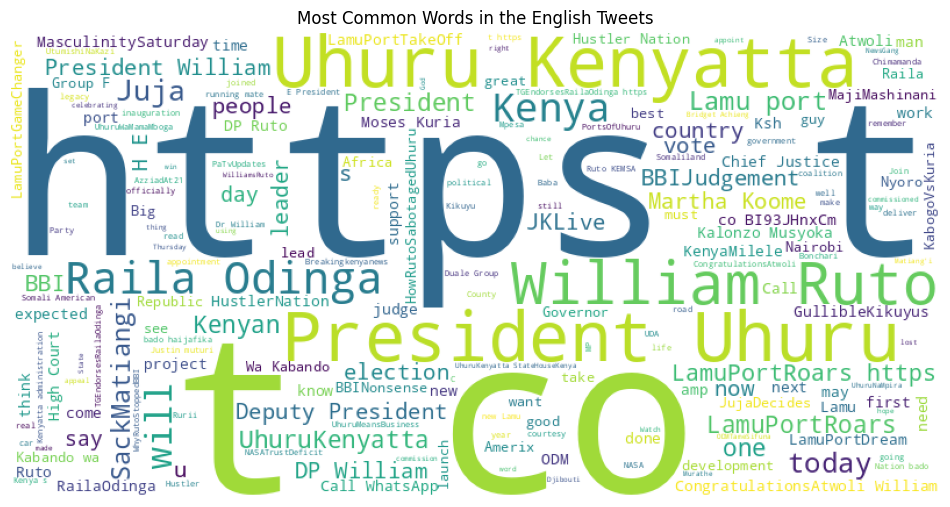

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(english_tweet_dataset['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Common Words in the English Tweets')
plt.show()

Next, I wanted to find the time range in which the tweets were written.

In [8]:
english_tweet_dataset.loc[:, 'time'] = pd.to_datetime(english_tweet_dataset['date'])

earliest_tweet = english_tweet_dataset['time'].min()
latest_tweet = english_tweet_dataset['time'].max()

print(f"Earliest tweet: {earliest_tweet}")
print(f"Latest tweet: {latest_tweet}")


Earliest tweet: 2021-05-15 10:05:43
Latest tweet: 2021-06-19 05:43:07


<ipython-input-8-d0cbc10262a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_tweet_dataset.loc[:, 'time'] = pd.to_datetime(english_tweet_dataset['date'])


Now that I have filtered the data to have only have english tweets for easier calssification. I now want to group tweets on whether they are hate speech or not.

# Building the sentiment analysis model for the tweets

Well, now I will create a model that will evaluate the tweets and get their polarity. The model uses a bag-of-words approach to represent the text data as numerical features. It first preprocesses the tweets by removing URLs, HTML tags, punctuation, stop words (for English tweets), and applying stemming (for English tweets). The preprocessed tweets are then converted into a sparse matrix of token counts using the CountVectorizer from scikit-learn. This matrix serves as the input features for the model. The model itself is a Decision Tree Classifier, which builds a tree-like structure by recursively splitting the data based on the most discriminative features. During training, the Decision Tree algorithm learns the optimal feature splits and decision rules to classify the tweets into "Hate Speech" or "No Hate and Offensive Speech" categories. The trained model can then make predictions on new, unseen tweets by traversing the decision tree and following the learned decision rules based on the tweet's feature values.

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

# Read the datasets
swahili_raw_dataset = pd.read_csv('/content/drive/MyDrive/swahili_train.csv')
english_raw_dataset = pd.read_csv('/content/drive/MyDrive/english_offensiveness_labeled_data.csv')

# Read Swahili stop words
swahili_stopwords_df = pd.read_csv('/content/drive/MyDrive/Common_Swahili_Stop-words.csv', header=None)
swahili_stopwords = swahili_stopwords_df.iloc[:, 0].tolist()
swahili_stopword_set = set(swahili_stopwords)

# Preprocess the data
swahili_data = swahili_raw_dataset.copy()
swahili_data = swahili_data.rename(columns={'text': 'tweet', 'labels': 'labels'})

english_data = english_raw_dataset.copy()
english_data["labels"] = english_data["class"].map({0: "Hate Speech", 1: "Hate Speech", 2: "No Hate and Offensive Speech"})
english_data = english_data[["tweet", "labels"]]

combined_data = pd.concat([swahili_data, english_data], ignore_index=True)

def clean_swahili(text):
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in swahili_stopword_set]
    text = " ".join(text)
    return text

def clean_english(text):
    text = str(text).lower()
    text = re.sub('[.?]', '', text)
    text = re.sub('https?://\S+|www.\S+', '', text)
    text = re.sub('<.?>+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

combined_data["tweet"] = combined_data.apply(lambda row: clean_english(row["tweet"]) if row["labels"] == "No Hate and Offensive Speech" else clean_swahili(row["tweet"]), axis=1)

x = np.array(combined_data["tweet"])
y = np.array(combined_data["labels"])

# Convert all labels to strings
y = y.astype(str)

# Encode string labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

cv = CountVectorizer()
X = cv.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 0.9620949663745669


# Classifying kenyan tweets on the level of polarity